In [1]:
using Revise

ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
using FileIO
using JLD2
using RiskSensitiveSAC

┌ Info: Precompiling RiskSensitiveSAC [e1fab9f6-18d5-46a3-a575-fcee50e8520a]
└ @ Base loading.jl:1278
┌ Info: Number of Julia Thread(s): 1
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: GeForce GTX 1050 Ti with Max-Q Design
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/env_trajectron++/bin/python3.6
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:41


In [2]:
include("$(@__DIR__)/../scripts/default_params/params_data_gaussian.jl");

dtr = 0.4;                                                                          # replanning time interval [s]
tcalc = 0.2;                                                                        # pre-allocated control computation time [s] (< dtr)

model_dir = normpath(joinpath(@__DIR__, "../CrowdNav/crowd_nav/data/output_om_sarl_radius_0.4")) # directory of the trained policy
env_config = "env.config"                                                           # environment config file name
policy_config = "policy.config"                                                     # policy config file name
policy_name = "sarl"                                                                # policy name


include("$(@__DIR__)/../scripts/parameter_setup_crowd_nav.jl");

In [3]:
scene_loader, controller, w_init, ado_inputs, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param, cnt_param,
                 cost_param=cost_param,
                 dtc=dtc,
                 prediction_steps=prediction_steps,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
CrowdNav Controller
Loaded evaluation data from /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905


In [4]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec, target_speed,
                  measurement_schedule, target_trajectory, pos_error_replan, 
                  ado_inputs_init=ado_inputs);

┌ Warning: Time 0.00 [sec]: BIC computation took 0.379 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/crowd_nav_controller.jl:86
┌ Warning: Time 0.00 [sec]: This evaluation iteration took 0.244 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:289


In [5]:
display_log(result.log)

Time 0.00 [sec]: New CrowdNav control computation is scheduled.
Time 0.00 [sec]: New CrowdNav control is available to the controller.
Time 0.00 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.02 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.04 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.06 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.08 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.10 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.12 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.14 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.16 [sec]: Control: [0.669696006638907, -0.13321081810524826] is applied to the system.
Time 0.18 [sec]: Con

Time 1.94 [sec]: Control: [0.5693313884533182, -0.37966869051129115] is applied to the system.
Time 1.96 [sec]: Control: [0.5693313884533182, -0.37966869051129115] is applied to the system.
Time 1.98 [sec]: Control: [0.5693313884533182, -0.37966869051129115] is applied to the system.
Time 2.00 [sec]: New measurement is obtained.
Time 2.00 [sec]: New CrowdNav control computation is scheduled.
Time 2.00 [sec]: Control: [0.5693313884533182, -0.37966869051129115] is applied to the system.
Time 2.02 [sec]: New CrowdNav control is available to the controller.
Time 2.02 [sec]: Control: [0.028550281423496554, -0.019000085877826645] is applied to the system.
Time 2.04 [sec]: Control: [0.028550281423496554, -0.019000085877826645] is applied to the system.
Time 2.06 [sec]: Control: [0.028550281423496554, -0.019000085877826645] is applied to the system.
Time 2.08 [sec]: Control: [0.028550281423496554, -0.019000085877826645] is applied to the system.
Time 2.10 [sec]: Control: [0.028550281423496554,

Time 3.90 [sec]: Control: [0.6633785194909645, -0.14470255033019297] is applied to the system.
Time 3.92 [sec]: Control: [0.6633785194909645, -0.14470255033019297] is applied to the system.
Time 3.94 [sec]: Control: [0.6633785194909645, -0.14470255033019297] is applied to the system.
Time 3.96 [sec]: Control: [0.6633785194909645, -0.14470255033019297] is applied to the system.
Time 3.98 [sec]: Control: [0.6633785194909645, -0.14470255033019297] is applied to the system.
Time 4.00 [sec]: New measurement is obtained.
Time 4.00 [sec]: New CrowdNav control computation is scheduled.
Time 4.00 [sec]: Control: [0.6633785194909645, -0.14470255033019297] is applied to the system.
Time 4.02 [sec]: New CrowdNav control is available to the controller.
Time 4.02 [sec]: Control: [0.06801242948630555, -0.014803594822750676] is applied to the system.
Time 4.04 [sec]: Control: [0.06801242948630555, -0.014803594822750676] is applied to the system.
Time 4.06 [sec]: Control: [0.06801242948630555, -0.01480

Time 5.84 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.86 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.88 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.90 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.92 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.94 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.96 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 5.98 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 6.00 [sec]: New measurement is obtained.
Time 6.00 [sec]: New CrowdNav control computation is scheduled.
Time 6.00 [sec]: Control: [0.03211721031981669, -0.006394335268106177] is applied to the system.
Time 6.02 [sec]: 

Time 7.82 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.84 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.86 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.88 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.90 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.92 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.94 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.96 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 7.98 [sec]: Control: [-0.3010599472021895, 2.1600946870185203] is applied to the system.
Time 8.00 [sec]: New measurement is obtained.
Time 8.00 [sec]: New CrowdNav control computation is scheduled.
Time 8.00 [sec]: Control: [-0.30105994720218

Time 9.76 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.78 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.80 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.82 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.84 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.86 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.88 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.90 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.92 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.94 [sec]: Control: [0.11205007247762425, -0.5652937154451618] is applied to the system.
Time 9.96 [sec]: Control: [0.11205007247762425, -0

In [6]:
result.total_cnt_cost

1.4750199846190262

In [7]:
result.total_pos_cost

3.794493711701951

In [8]:
result.total_col_cost

69.10280919010977

In [9]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

74.37232288643074

In [10]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.22946757358849654

┌ Warning: No prediction is available with BIC or CrowdNav Controller
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/utils.jl:664
Progress: 100%|█████████████████████████████████████████| Time: 0:00:29
┌ Info: Saved animation to 
│   fn = /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/8_crowd_nav_data.gif
└ @ Plots /home/haruki/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/8_crowd_nav_data.gif")
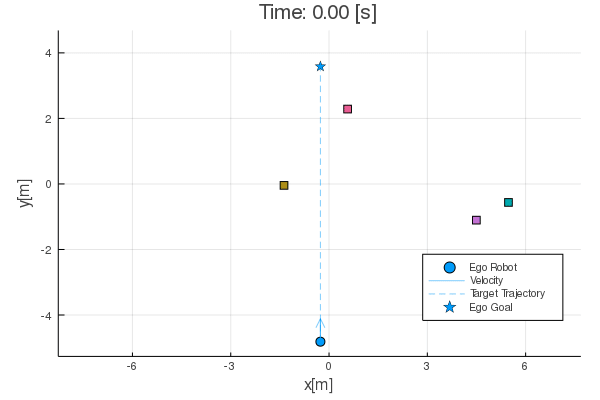

In [11]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="8_crowd_nav_data.gif")

In [12]:
save("8_crowd_nav_data.jld2", "result", result)